In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pickle

In [3]:
df = pd.read_csv("healthcare_dataset.csv")

In [4]:
df.drop(columns=['Name'], inplace=True)

In [5]:
df

Age  Gender Blood Type Medical Condition Date of Admission  \
0       30    Male         B-            Cancer        2024-01-31   
1       62    Male         A+           Obesity        2019-08-20   
2       76  Female         A-           Obesity        2022-09-22   
3       28  Female         O+          Diabetes        2020-11-18   
4       43  Female        AB+            Cancer        2022-09-19   
...    ...     ...        ...               ...               ...   
55495   42  Female         O+            Asthma        2020-08-16   
55496   61  Female        AB-           Obesity        2020-01-23   
55497   38  Female         B+      Hypertension        2020-07-13   
55498   43    Male         O-         Arthritis        2019-05-25   
55499   53  Female         O+         Arthritis        2024-04-02   

                 Doctor                      Hospital Insurance Provider  \
0         Matthew Smith               Sons and Miller         Blue Cross   
1       Samantha Davies                       Kim Inc           Medicare   
2      Tiffany Mitchell                      Cook PLC              Aetna   
3           Kevin Wells    Hernandez Rogers and Vang,           Medicare   
4        Kathleen Hanna                   White-White              Aetna   
...                 ...                           ...                ...   
55495     Joshua Jarvis                Jones-Thompson         Blue Cross   
55496   Taylor Sullivan                  Tucker-Moyer              Cigna   
55497    Joe Jacobs DVM  and Mahoney Johnson Vasquez,   UnitedHealthcare   
55498    Kimberly Curry      Jackson Todd and Castro,           Medicare   
55499     Dennis Warren                Henry Sons and              Aetna   

       Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0        18856.281306          328         Urgent     2024-02-02  Paracetamol   
1        33643.327287          265      Emergency     2019-08-26    Ibuprofen   
2        27955.096079          205      Emergency     2022-10-07      Aspirin   
3        37909.782410          450       Elective     2020-12-18    Ibuprofen   
4        14238.317814          458         Urgent     2022-10-09   Penicillin   
...               ...          ...            ...            ...          ...   
55495     2650.714952          417       Elective     2020-09-15   Penicillin   
55496    31457.797307          316       Elective     2020-02-01      Aspirin   
55497    27620.764717          347         Urgent     2020-08-10    Ibuprofen   
55498    32451.092358          321       Elective     2019-05-31    Ibuprofen   
55499     4010.134172          448         Urgent     2024-04-29    Ibuprofen   

       Test Results  
0            Normal  
1      Inconclusive  
2            Normal  
3          Abnormal  
4          Abnormal  
...             ...  
55495      Abnormal  
55496        Normal  
55497      Abnormal  
55498      Abnormal  
55499      Abnormal  

[55500 rows x 14 columns]

In [6]:
date_columns = ['Date of Admission', 'Discharge Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[col] = df[col].map(lambda x: x.toordinal() if pd.notnull(x) else np.nan)


In [7]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [8]:
df.fillna(df.mode().iloc[0], inplace=True)


In [9]:
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [10]:
X = df.drop(columns=['Medical Condition'])
y = df['Medical Condition']

In [11]:
X

Age  Gender  Blood Type  Date of Admission  Doctor  Hospital  \
0       30       1           5             738916   26612     29933   
1       62       1           0             737291   33648     16012   
2       76       0           1             738420   37828      5473   
3       28       0           6             737747   22511     12317   
4       43       0           2             738417   21259     33598   
...    ...     ...         ...                ...     ...       ...   
55495   42       0           6             737653   20003     15553   
55496   61       0           3             737447   37149     31722   
55497   38       0           4             737619   18550     37408   
55498   43       1           7             737204   22665     14329   
55499   53       0           6             738978   10782     12207   

       Insurance Provider  Billing Amount  Room Number  Admission Type  \
0                       1    18856.281306          328               2   
1                       3    33643.327287          265               1   
2                       0    27955.096079          205               1   
3                       3    37909.782410          450               0   
4                       0    14238.317814          458               2   
...                   ...             ...          ...             ...   
55495                   1     2650.714952          417               0   
55496                   2    31457.797307          316               0   
55497                   4    27620.764717          347               2   
55498                   3    32451.092358          321               0   
55499                   0     4010.134172          448               2   

       Discharge Date  Medication  Test Results  
0              738918           3             2  
1              737297           1             1  
2              738435           0             2  
3              737777           1             0  
4              738437           4             0  
...               ...         ...           ...  
55495          737683           4             0  
55496          737456           0             2  
55497          737647           1             0  
55498          737210           1             0  
55499          739005           1             0  

[55500 rows x 13 columns]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_test

Age  Gender  Blood Type  Date of Admission  Doctor  Hospital  \
31641   57       1           6             738778   16501     31444   
9246    51       0           0             738800   17842     33696   
1583    20       1           0             737311   34229      3130   
36506   74       0           4             737682    6595     34248   
11259   56       1           3             738552   29464     34391   
...    ...     ...         ...                ...     ...       ...   
32183   34       1           7             737729   40289     27002   
17967   46       1           2             738193   10050     31136   
46192   74       0           4             737407   36710      2917   
43968   55       0           3             737268   25996      4259   
47331   62       0           3             737775    1670      6976   

       Insurance Provider  Billing Amount  Room Number  Admission Type  \
31641                   3     3616.898450          339               0   
9246                    0    36970.075481          372               1   
1583                    1    44393.001348          148               0   
36506                   0    27554.923708          135               1   
11259                   0    27466.318567          284               1   
...                   ...             ...          ...             ...   
32183                   4     8351.418347          353               0   
17967                   4     5575.897209          498               0   
46192                   4    38654.187027          437               1   
43968                   0     5278.640155          184               0   
47331                   1     9809.722624          457               2   

       Discharge Date  Medication  Test Results  
31641          738795           0             1  
9246           738807           4             0  
1583           737340           4             1  
36506          737689           1             0  
11259          738558           3             1  
...               ...         ...           ...  
32183          737750           3             0  
17967          738217           3             2  
46192          737425           2             2  
43968          737281           1             0  
47331          737784           4             2  

[11100 rows x 13 columns]

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_pred

array([2, 3, 5, ..., 1, 4, 3])

In [17]:
a=[2, 3, 5, ..., 3, 3, 2]
len(a)

7

In [18]:
y_test

31641    3
9246     3
1583     1
36506    5
11259    5
        ..
32183    0
17967    1
46192    5
43968    2
47331    1
Name: Medical Condition, Length: 11100, dtype: int64

In [19]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [20]:
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

In [21]:
print("Comparison:\n", comparison.head(10))

Comparison:
    Actual  Predicted
0       3          2
1       3          3
2       1          5
3       5          3
4       5          4
5       2          2
6       1          5
7       3          0
8       0          2
9       2          3


In [22]:
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 16.64%


In [23]:
with open("healthcare_logistic_model.pkl", "wb") as f:
    pickle.dump((model, X.columns.tolist()), f)

print("Model saved as 'healthcare_logistic_model.pkl'")

Model saved as 'healthcare_logistic_model.pkl'


In [24]:
!pip install lime

In [25]:
import lime
import lime.lime_tabular
import numpy as np

# Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    class_names=label_encoders['Medical Condition'].classes_.tolist(),  # class names from LabelEncoder for 'Medical Condition'
    mode='classification'
)

# Helper: Keras predict_proba wrapper
# Logistic Regression model directly provides predict_proba
def predict_proba_wrapper(data):
    return model.predict_proba(data)

# Explain a test instance (e.g., first row)
i = 0
exp = explainer.explain_instance(
    data_row=X_test.iloc[i].values, # Pass data_row as a numpy array
    predict_fn=predict_proba_wrapper,
    num_features=5
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


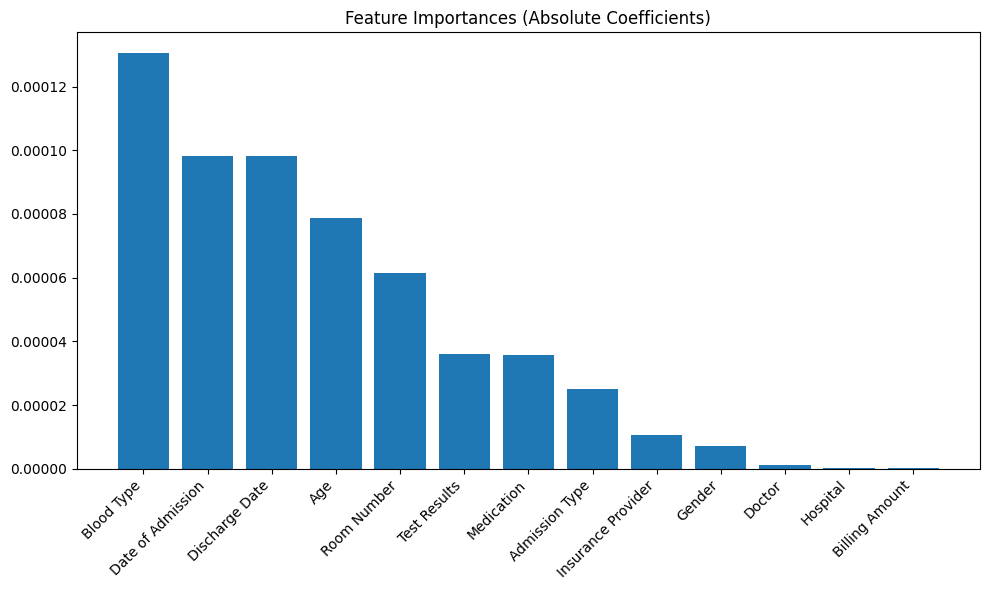

In [26]:
import matplotlib.pyplot as plt

# For Logistic Regression, use absolute coefficients as a measure of importance
importances = np.abs(model.coef_[0])  # Use coef_[0] for binary classification, adjust for multi-class
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances (Absolute Coefficients)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
!pip install eli5

In [28]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())


In [29]:
!pip install alibi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sk

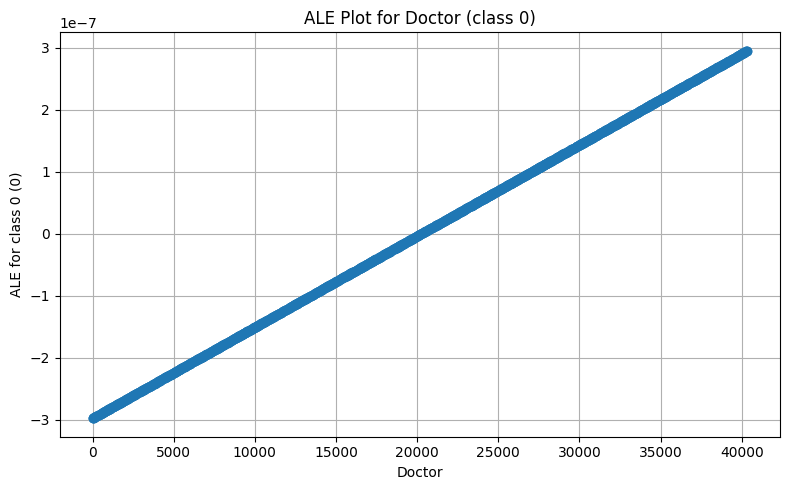

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from alibi.explainers import ALE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd # Import pandas to use .toordinal()

# Re-initialize scaler and label_encoders (since they were not saved with the model)
# This assumes the same preprocessing steps are applied in the same order
scaler = StandardScaler()
# Assuming X is still available from previous cells
scaler.fit(X)

label_encoders = {}
categorical_cols_to_encode = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results'] # Specify the categorical columns that were encoded

for col in categorical_cols_to_encode:
    le = LabelEncoder()
    # Assuming df is still available from previous cells
    le.fit(df[col].astype(str)) # Fit on the original data to ensure all categories are captured
    label_encoders[col] = le

# Define feature_names using the columns from X_train
feature_names = X_train.columns.tolist()

# Get the target encoder
target_encoder = label_encoders['Medical Condition']


# === Your predict function (after scaling) ===
def predict_fn(X):
    # Convert ordinal dates back to datetime objects for the scaler if necessary, or scale ordinal values directly
    # Given the previous data wrangling, the dates are already ordinals, so direct scaling of the numpy array is appropriate.
    X_scaled = scaler.transform(X)
    return model.predict_proba(X_scaled)

# === Select the feature to analyze ===
target_feature = 'Doctor'  # You can change to 'Hospital', 'Age', etc.
if target_feature in feature_names:
    feature_idx = feature_names.index(target_feature)
else:
    raise ValueError(f"Target feature '{target_feature}' not found in feature names.")


# === Setup ALE explainer ===
# The ALE explainer needs the original training data, not scaled
ale = ALE(predict_fn, feature_names=feature_names)


# === Explain on the test set ===
# Pass X_test as a numpy array
ale_exp = ale.explain(np.array(X_test), features=[feature_idx])

# === Extract class probabilities for a specific class ===
# You can choose a specific class index to plot ALE for
# For example, plotting for the first class in the target encoder
class_index_to_plot = 0 # Change this index to plot for a different medical condition class
if class_index_to_plot < len(target_encoder.classes_):
    ale_class_vals = ale_exp.ale_values[0][:, class_index_to_plot]

    # === Plotting ===
    plt.figure(figsize=(8, 5))
    plt.plot(ale_exp.feature_values[0], ale_class_vals, marker='o')
    plt.xlabel(target_feature)
    plt.ylabel(f'ALE for class {class_index_to_plot} ({target_encoder.classes_[class_index_to_plot]})')
    plt.title(f'ALE Plot for {target_feature} (class {class_index_to_plot})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"Class index {class_index_to_plot} is out of bounds. There are {len(target_encoder.classes_)} classes.")

In [34]:
import pickle

In [35]:
with open("logistic_model.pkl", "wb") as f:
    pickle.dump((model, X.columns.tolist(), scaler, label_encoders), f)

In [36]:
# How many distinct labels did the model actually see?
import numpy as np
np.unique(y_train, return_counts=True)          # should print >2 classes

# What does the model predict on the whole test set?
pred_test = model.predict(X_test)
vals, cnts   = np.unique(pred_test, return_counts=True)
print("Prediction distribution:", dict(zip(vals, cnts)))


Prediction distribution: {0: 321, 1: 517, 2: 2728, 3: 2397, 4: 2355, 5: 2782}


In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    max_iter=2000,
    solver='lbfgs',
    multi_class='multinomial',
    class_weight='balanced'        # fights imbalance
)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=2000,
                   multi_class='multinomial')

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN model
model = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1671 - loss: -338514656.0000 - val_accuracy: 0.1664 - val_loss: -4403243008.0000
Epoch 2/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1645 - loss: -8352350208.0000 - val_accuracy: 0.1664 - val_loss: -24532209664.0000
Epoch 3/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1665 - loss: -33762318336.0000 - val_accuracy: 0.1664 - val_loss: -66091372544.0000
Epoch 4/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1667 - loss: -81915355136.0000 - val_accuracy: 0.1664 - val_loss: -133959704576.0000
Epoch 5/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1643 - loss: -160366411776.0000 - val_accuracy: 0.1664 - val_loss: -233139650560.0000
Epoch 6/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.1624 - loss: -271824109568.0000 - val_accuracy: 0.1664 - val_loss: -369793400832.0000
Epoch 7/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1644 - loss: -41

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Re-initialize scaler and label_encoders (since they were not saved with the model)
# This assumes the same preprocessing steps are applied in the same order
scaler = StandardScaler()
# Assuming X is still available from previous cells
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.long) # Use .values to get numpy array and specify dtype

# Split into datasets
X_train_torch, X_test_torch, y_train_torch, y_test_torch = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
train_ds = TensorDataset(X_train_torch, y_train_torch)
test_ds = TensorDataset(X_test_torch, y_test_torch)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=16, shuffle=False) # Add test loader for evaluation

# Define ANN
class ANN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.net(x)

# Get the original class names from the label encoder for the target variable
target_encoder = label_encoders['Medical Condition']
output_dim = len(target_encoder.classes_)


model = ANN(X_train_torch.shape[1], output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train
epochs = 10
for epoch in range(epochs):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')


# Evaluate
model.eval() # Set model to evaluation mode
with torch.no_grad():
    y_pred_list = []
    y_test_list = []
    for xb, yb in test_loader:
        preds = model(xb)
        y_pred_list.append(torch.argmax(preds, dim=1).cpu().numpy())
        y_test_list.append(yb.cpu().numpy())

    y_pred_torch = np.concatenate(y_pred_list)
    y_test_torch = np.concatenate(y_test_list)


    acc = accuracy_score(y_test_torch, y_pred_torch)
    print("Accuracy (PyTorch):", acc)
    print("Classification Report:\n", classification_report(y_test_torch, y_pred_torch, target_names=target_encoder.classes_))

Epoch 10/10, Loss: 1.7981
Accuracy (PyTorch): 0.17216216216216215
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.04      0.07      1915
           1       0.17      0.20      0.19      1847
           2       0.17      0.30      0.22      1871
           3       0.17      0.14      0.16      1822
           4       0.16      0.19      0.18      1788
           5       0.20      0.15      0.17      1857

    accuracy                           0.17     11100
   macro avg       0.17      0.17      0.16     11100
weighted avg       0.17      0.17      0.16     11100



In [43]:
!pip install gradio

In [44]:
import gradio as gr
import numpy as np
import pandas as pd
import pickle

# Load model, features, scaler, encoders
with open("logistic_model.pkl", "rb") as f:
    model, feature_names, scaler, label_encoders = pickle.load(f)

def predict_healthcare(
    age, gender, blood_type, date_of_admission, doctor, hospital,
    insurance_provider, billing_amount, room_number, admission_type,
    discharge_date, medication, test_results
):
    try:
        input_dict = {
            "Age": age,
            "Gender": label_encoders["Gender"].transform([gender])[0],
            "Blood Type": label_encoders["Blood Type"].transform([blood_type])[0],
            "Date of Admission": pd.to_datetime(date_of_admission).toordinal(),
            "Doctor": label_encoders["Doctor"].transform([doctor])[0],
            "Hospital": label_encoders["Hospital"].transform([hospital])[0],
            "Insurance Provider": label_encoders["Insurance Provider"].transform([insurance_provider])[0],
            "Billing Amount": billing_amount,
            "Room Number": room_number,
            "Admission Type": label_encoders["Admission Type"].transform([admission_type])[0],
            "Discharge Date": pd.to_datetime(discharge_date).toordinal(),
            "Medication": label_encoders["Medication"].transform([medication])[0],
            "Test Results": label_encoders["Test Results"].transform([test_results])[0]
        }

        input_values = np.array([input_dict[feat] for feat in feature_names]).reshape(1, -1)
        input_scaled = scaler.transform(input_values)

        encoded_pred = model.predict(input_scaled)[0]
        medical_condition = label_encoders["Medical Condition"].inverse_transform([encoded_pred])[0]
        return medical_condition

    except Exception as e:
        return f"Error: {str(e)}"

# Dropdown options
gender_choices = label_encoders["Gender"].classes_.tolist()
blood_type_choices = label_encoders["Blood Type"].classes_.tolist()
doctor_choices = label_encoders["Doctor"].classes_.tolist()
hospital_choices = label_encoders["Hospital"].classes_.tolist()
insurance_provider_choices = label_encoders["Insurance Provider"].classes_.tolist()
admission_type_choices = label_encoders["Admission Type"].classes_.tolist()
medication_choices = label_encoders["Medication"].classes_.tolist()
test_results_choices = label_encoders["Test Results"].classes_.tolist()

interface = gr.Interface(
    fn=predict_healthcare,
    inputs=[
        gr.Number(label="Age"),
        gr.Dropdown(choices=gender_choices, label="Gender"),
        gr.Dropdown(choices=blood_type_choices, label="Blood Type"),
        gr.Textbox(label="Date of Admission (YYYY-MM-DD)"),
        gr.Dropdown(choices=doctor_choices, label="Doctor"),
        gr.Dropdown(choices=hospital_choices, label="Hospital"),
        gr.Dropdown(choices=insurance_provider_choices, label="Insurance Provider"),
        gr.Number(label="Billing Amount"),
        gr.Number(label="Room Number"),
        gr.Dropdown(choices=admission_type_choices, label="Admission Type"),
        gr.Textbox(label="Discharge Date (YYYY-MM-DD)"),
        gr.Dropdown(choices=medication_choices, label="Medication"),
        gr.Dropdown(choices=test_results_choices, label="Test Results"),
    ],
    outputs="text",
    title="Healthcare Medical Condition Prediction",
    description="Predicts medical condition using a trained logistic regression model."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5db233c4ff0e4d4268.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
